<a href="https://colab.research.google.com/github/joohoshin/Python_Basic/blob/master/19_2_%EC%95%84%ED%8C%8C%ED%8A%B8_%EC%8B%A4%EA%B1%B0%EB%9E%98%EA%B0%80_%EB%AA%A8%EB%8D%B8_%EC%98%88%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 아파트 실거래가 모델 만들기
* 15강에서 살펴본 아파트 실거래가를 regression 모델을 만들어봅시다
* http://rtdown.molit.go.kr/

In [ ]:
from google.colab import drive
drive.mount('/g')

Drive already mounted at /g; to attempt to forcibly remount, call drive.mount("/g", force_remount=True).


In [ ]:
import pandas as pd

# data 읽기
data = pd.read_csv('/g/My Drive/Python_202002/아파트(매매)__실거래가_20200919105434.csv', encoding='cp949',
                   skiprows = 15)  #skiprows 옵션을 통해 불필요한 행을 건너뛸수 있습니다

In [ ]:
data

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명
0,강원도 강릉시 견소동,202,0202,0,송정한신,39.0800,202008,4,"11,800",7,1997,경강로2539번길 8
1,강원도 강릉시 견소동,202,0202,0,송정한신,43.3800,202008,11,"12,500",12,1997,경강로2539번길 8
2,강원도 강릉시 견소동,202,0202,0,송정한신,84.9150,202008,13,"16,350",10,1997,경강로2539번길 8
3,강원도 강릉시 견소동,202,0202,0,송정한신,39.0800,202008,26,"8,940",4,1997,경강로2539번길 8
4,강원도 강릉시 견소동,202,0202,0,송정한신,84.9300,202008,29,"14,500",2,1997,경강로2539번길 8
...,...,...,...,...,...,...,...,...,...,...,...,...
48153,충청북도 충주시 호암동,1191,1191,0,호암 힐데스하임,84.8900,202008,15,"32,700",9,2019,호암토성2로 1
48154,충청북도 충주시 호암동,905,0905,0,호암동수채,84.9289,202008,24,"18,600",1,2007,호암중앙1로 47
48155,충청북도 충주시 호암동,221-23,0221,23,호암리버빌(1단지),84.6800,202008,8,"15,000",7,2002,원호암5길 32
48156,충청북도 충주시 호암동,221-23,0221,23,호암리버빌(1단지),84.6800,202008,31,"16,450",5,2002,원호암5길 32


In [ ]:
# 연산을 위해 숫자형으로 되어 있는지 확인
data.dtypes

시군구          object
번지           object
본번           object
부번            int64
단지명          object
전용면적(㎡)     float64
계약년월          int64
계약일           int64
거래금액(만원)     object
층             int64
건축년도          int64
도로명          object
dtype: object

In [ ]:
# 문자로 인식된 것을 숫자로 바꾼다. 그러려면 ,를 먼저 삭제해야 한다
data['거래금액(만원)'] = data['거래금액(만원)'].str.replace(',','')

In [ ]:
data['거래금액(만원)'] = data['거래금액(만원)'].astype('int')

In [ ]:
# 비교를 위해 평당가격을 계산한다. 
df = data.assign(평당단가 = data['거래금액(만원)']/data['전용면적(㎡)'])

In [ ]:
df

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,평당단가
0,강원도 강릉시 견소동,202,0202,0,송정한신,39.0800,202008,4,11800,7,1997,경강로2539번길 8,301.944729
1,강원도 강릉시 견소동,202,0202,0,송정한신,43.3800,202008,11,12500,12,1997,경강로2539번길 8,288.151222
2,강원도 강릉시 견소동,202,0202,0,송정한신,84.9150,202008,13,16350,10,1997,경강로2539번길 8,192.545487
3,강원도 강릉시 견소동,202,0202,0,송정한신,39.0800,202008,26,8940,4,1997,경강로2539번길 8,228.761515
4,강원도 강릉시 견소동,202,0202,0,송정한신,84.9300,202008,29,14500,2,1997,경강로2539번길 8,170.728836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48153,충청북도 충주시 호암동,1191,1191,0,호암 힐데스하임,84.8900,202008,15,32700,9,2019,호암토성2로 1,385.204382
48154,충청북도 충주시 호암동,905,0905,0,호암동수채,84.9289,202008,24,18600,1,2007,호암중앙1로 47,219.006722
48155,충청북도 충주시 호암동,221-23,0221,23,호암리버빌(1단지),84.6800,202008,8,15000,7,2002,원호암5길 32,177.137459
48156,충청북도 충주시 호암동,221-23,0221,23,호암리버빌(1단지),84.6800,202008,31,16450,5,2002,원호암5길 32,194.260746


### 경기도 안양시 분석
* 지역 편차가 크므로 한개의 시에 대해서 아파트 가격 요인을 분석해봅시다

In [ ]:
# 안양시 선택
안양 = df.시군구.str.contains('안양동안구')

In [ ]:
안양

0        False
1        False
2        False
3        False
4        False
         ...  
48153    False
48154    False
48155    False
48156    False
48157    False
Name: 시군구, Length: 48158, dtype: bool

In [ ]:
anyang_df = df[안양]

In [ ]:
# 경기도 안양시 이외에 안양이 들어간 곳이 있는 확인
anyang_df.시군구.unique()

array(['경기도 안양동안구 관양동', '경기도 안양동안구 비산동', '경기도 안양동안구 평촌동', '경기도 안양동안구 호계동'],
      dtype=object)

In [ ]:
anyang_df.columns

Index(['시군구', '번지', '본번', '부번', '단지명', '전용면적(㎡)', '계약년월', '계약일', '거래금액(만원)',
       '층', '건축년도', '도로명', '평당단가'],
      dtype='object')

In [ ]:
# 분석에 활용할 데이터만 선택
anyang_df = anyang_df.filter(['층','건축년도','전용면적(㎡)','평당단가'])

In [ ]:
anyang_df.head()

,층,건축년도,전용면적(㎡),평당단가
9176,20,1993,49.8,662.650602
9177,3,1993,49.8,702.811245
9178,6,1993,49.8,740.963855
9179,2,1993,49.8,640.562249
9180,14,1993,49.8,718.875502


In [ ]:
anyang_df.dtypes

층            int64
건축년도         int64
전용면적(㎡)    float64
평당단가       float64
dtype: object

In [ ]:
anyang_df = anyang_df.rename(columns={'전용면적(㎡)':'전용면적'})

* seaborn pairplot으로 요소들의 관계를 살펴봅시다

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.


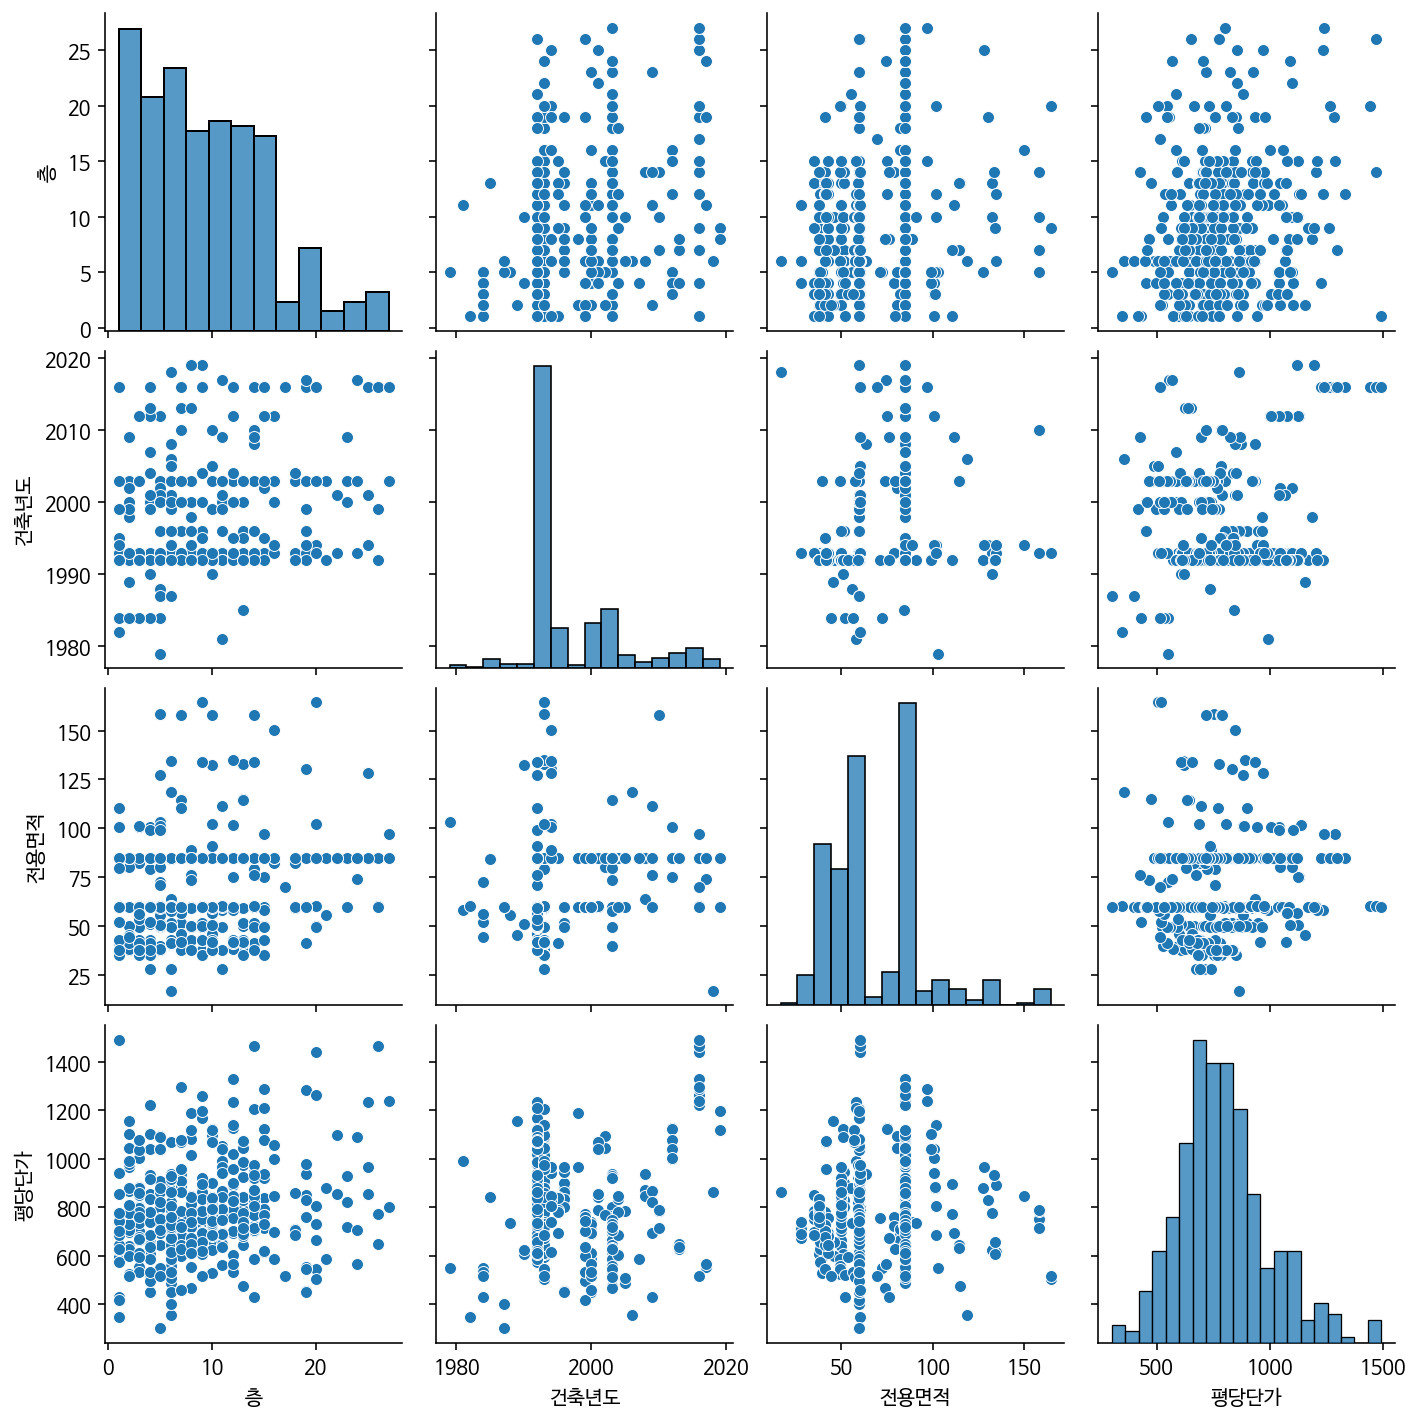

In [ ]:
import seaborn as sns
sns.pairplot(anyang_df)

In [ ]:
import statsmodels.formula.api as smf

# 평당단가와 층, 건축년도, 전용면적의 모델을 만들어보자
lm = smf.ols(formula='평당단가 ~ 층+건축년도+전용면적', data=anyang_df).fit()
lm.summary() # 기본적인 통계치 출력

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   평당단가   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     8.347
Date:                Wed, 11 Nov 2020   Prob (F-statistic):           2.21e-05
Time:                        01:58:05   Log-Likelihood:                -2478.7
No. Observations:                 371   AIC:                             4965.
Df Residuals:                     367   BIC:                             4981.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9340.7086   2874.050     -3.250      0.001    -1.5e+04   -3689.035
층              4.3796      1.788      2.449      0.015       0.863       7.896
건축년도           5.0551      1.444      3.500      0.001       2.215       7.895
전용면적           0.0020      0.408      0.005      0.996      -0.800       0.804
==============================================================================
Omnibus:                        5.844   Durbin-Watson:                   0.568
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                5.732
Skew:                           0.303   Prob(JB):                       0.0569
Kurtosis:                       3.067   Cond. No.                     5.70e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
def predict(model):
    층 = float(input('선호하는 층을 입력하세요 >> '))
    건축년도 = float(input('선호하는 건축년도를 입력하세요 >> '))
    전용면적 = float(input('선호하는 전용면적(m**2)을 입력하세요 >> '))
    data = {'층':층, '건축년도':건축년도, '전용면적':전용면적}
    p=model.predict(data)
    print('예상 평당단가(m**2)는 {:,.2f}만원입니다.'.format(p[0]))
    print('예상 가격은  {:,.2f}억원입니다. '.format((전용면적 * p[0])/10000))   
    

In [ ]:
p = predict(lm)

선호하는 층을 입력하세요 >> 6
선호하는 건축년도를 입력하세요 >> 1993
선호하는 전용면적(m**2)을 입력하세요 >> 118
예상 평당단가(m**2)는 760.69만원입니다.
예상 가격은  8.98억원입니다. 


In [ ]:
lm.params

Intercept   -9340.708567
층               4.379594
건축년도            5.055134
전용면적            0.001977
dtype: float64

In [ ]:
lm.params.Intercept

-9340.708567438527

In [ ]:
print("model")
print("평당단가 = {:.2f} + {:.2f}*층 + {:.2f}*건축년도 + {:.2f}* 전용면적".format(lm.params.Intercept, lm.params.층, lm.params.건축년도, lm.params.전용면적))

model
평당단가 = -9340.71 + 4.38*층 + 5.06*건축년도 + 0.00* 전용면적
